In [1]:
import mercury as mr # for widgets
from unity_py.unity import Unity
from unity_py.unity_session import UnitySession
from unity_py.unity_services import UnityServices as services
import pandas as pd
from unity_py.resources.job import Job, JobStatus


In [2]:
app = mr.App(title="Unity Operator Dashboard - Mercury Sample", description="Sample Unity Dashboard in Mercury", show_code=False )


mercury.App

In [3]:
s = Unity()

In [4]:
process_service = s.client(services.PROCESS_SERVICE)
plist = process_service.get_processes()


In [5]:
deployed_processes = mr.Select(label="Select Workflow", choices=[x.id for x in plist ])



mercury.Select

In [9]:
if deployed_processes.value == "l1b-cwl:develop":

    j1 = Job(s, "https://my-sps-.com", deployed_processes, "1234" , JobStatus.RUNNING)
    j2 = Job(s, "https://my-sps-.com", deployed_processes, "iido" , JobStatus.RUNNING)
    j3 = Job(s, "https://my-sps-.com", deployed_processes, "131231455", JobStatus.SUCCEEDED )
    jobs = [j1, j2, j3]

    #jobs = process_service.get_jobs([for x in plist where x.id == deployed_processes ] )
    jdict = []
    for x in jobs:
        d = {"id":x.id , "status":str(x.status), "submission time": "2023-03-20T08:00:00Z", "process end time": "2023-03-20T08:02:00Z", "labels":"chirp, reprocessing"}
        jdict.append(d)
        
else:
    jdict = []


In [10]:
df = pd.DataFrame(jdict)

## Jobs
***

In [11]:
df

,id,status,submission time,process end time,labels
0,1234,JobStatus.RUNNING,2023-03-20T08:00:00Z,2023-03-20T08:02:00Z,"chirp, reprocessing"
1,iido,JobStatus.RUNNING,2023-03-20T08:00:00Z,2023-03-20T08:02:00Z,"chirp, reprocessing"
2,131231455,JobStatus.SUCCEEDED,2023-03-20T08:00:00Z,2023-03-20T08:02:00Z,"chirp, reprocessing"


In [12]:
deployed_jobs = mr.Select(label="Select Workflow", choices=[x['id'] for x in jdict ])


mercury.Select

## Job Details
***

In [35]:
internals = None
if deployed_jobs.value == '1234':
    internals = {"inputs": "dapa", "current_step": "stage in", "status":"RUNNING"}
elif deployed_jobs.value == "iido":
    internals = {"inputs": "data", "current_step": "processing", "status":"RUNNING"}
elif deployed_jobs.value == "131231455":
    internals = {"inputs": "dapa", "current_step": "none", "status":"SUCCEEDED"}

#
pd.DataFrame(internals,index=[0])

,inputs,current_step,status
0,dapa,stage in,RUNNING


In [40]:
import schemdraw
from schemdraw.flow import *
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'


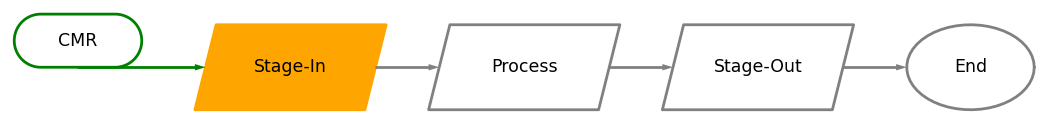

In [41]:
if deployed_jobs.value == "131231455":
    with schemdraw.Drawing() as d:
        d+= Start().label("CMR").color("green")
        d+= Arrow().right().color("green")

        #Input the string 
        d+= Data(w = 4).color('green').label("Stage-In", color="black")
        d+= Arrow().right(d.unit/2).color("green")

        d+= Data(w = 4).label("Process", color="black").color("green")
        d+= Arrow().right(d.unit/2).color("green")

        d+= Data(w = 4).label("Stage-Out", color="black").color("green")
        d+= Arrow().right(d.unit/2).color("green")

        d+= (end := Ellipse().label("End", color="black")).color("green")

    
else:
    with schemdraw.Drawing() as d:
        d+= Start().label("CMR", color="black").color("green")
        d+= Arrow().right().color("green")

        #Input the string 
        d+= Data(w = 4).label("Stage-In", color="black").color('orange').fill(True)
        d+= Arrow().right(d.unit/2).color("gray")

        d+= Data(w = 4).label("Process", color="black").color("gray")
        d+= Arrow().right(d.unit/2).color("gray")

        d+= Data(w = 4).label("Stage-Out", color="black").color("gray")
        d+= Arrow().right(d.unit/2).color("gray")

        d+= (end := Ellipse().label("End", color="black")).color("gray")
